In [1]:
from net.network import *
from evaluate import model_stats
import os
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

BLUE, RED = '#265cff' , '#ff265c'
plt.style.use('default')
CWD = os.getcwd()

In [2]:
with open("paths.txt", "r") as f:
    paths = f.readlines()

for i, _ in enumerate(paths):
    paths[i] = _.split('\n')[0]
cwd = os.getcwd()
PATH = os.path.join(cwd, paths[-1])
# PATH = 'C:\\Users\\Alien\\Coding\\SEM\\training\\Burgers\\1000N31\\NetA_MSE_epochs100000_blocks2_20200820T144956'
values = model_stats(PATH)

{'A': 0.0,
 'F': 1000.0,
 'U': 1000.0,
 'WF': 1000.0,
 'blocks': 2.0,
 'epochs': 10000.0,
 'epsilon': 1.0,
 'equation': 'Burgers',
 'file': '5000N31',
 'filters': 32.0,
 'ks': 5.0,
 'loss': 'MSE',
 'model': 'NetA',
 'nbfuncs': 1.0,
 'path': 'training\\Burgers\\5000N31\\NetA_epochs10000_20200821T181702',
 'transfer': 'None'}


In [3]:
df = pd.DataFrame(values)
df.describe()

,MAE_a,MSE_a,MinfE_a,MAE_u,MSE_u,MinfE_u
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000816,0.214628,0.002523,0.001159,0.120047,0.003841
std,0.001774,1.261991,0.005376,0.002382,0.745793,0.008115
min,0.000028,0.013725,0.000107,0.000050,0.007331,0.000158
25%,0.000129,0.039035,0.000447,0.000217,0.017755,0.000653
50%,0.000322,0.062383,0.001109,0.000515,0.029301,0.001547
75%,0.000871,0.135718,0.002729,0.001252,0.060349,0.004243
max,0.038147,31.514097,0.123519,0.051328,17.287985,0.186695


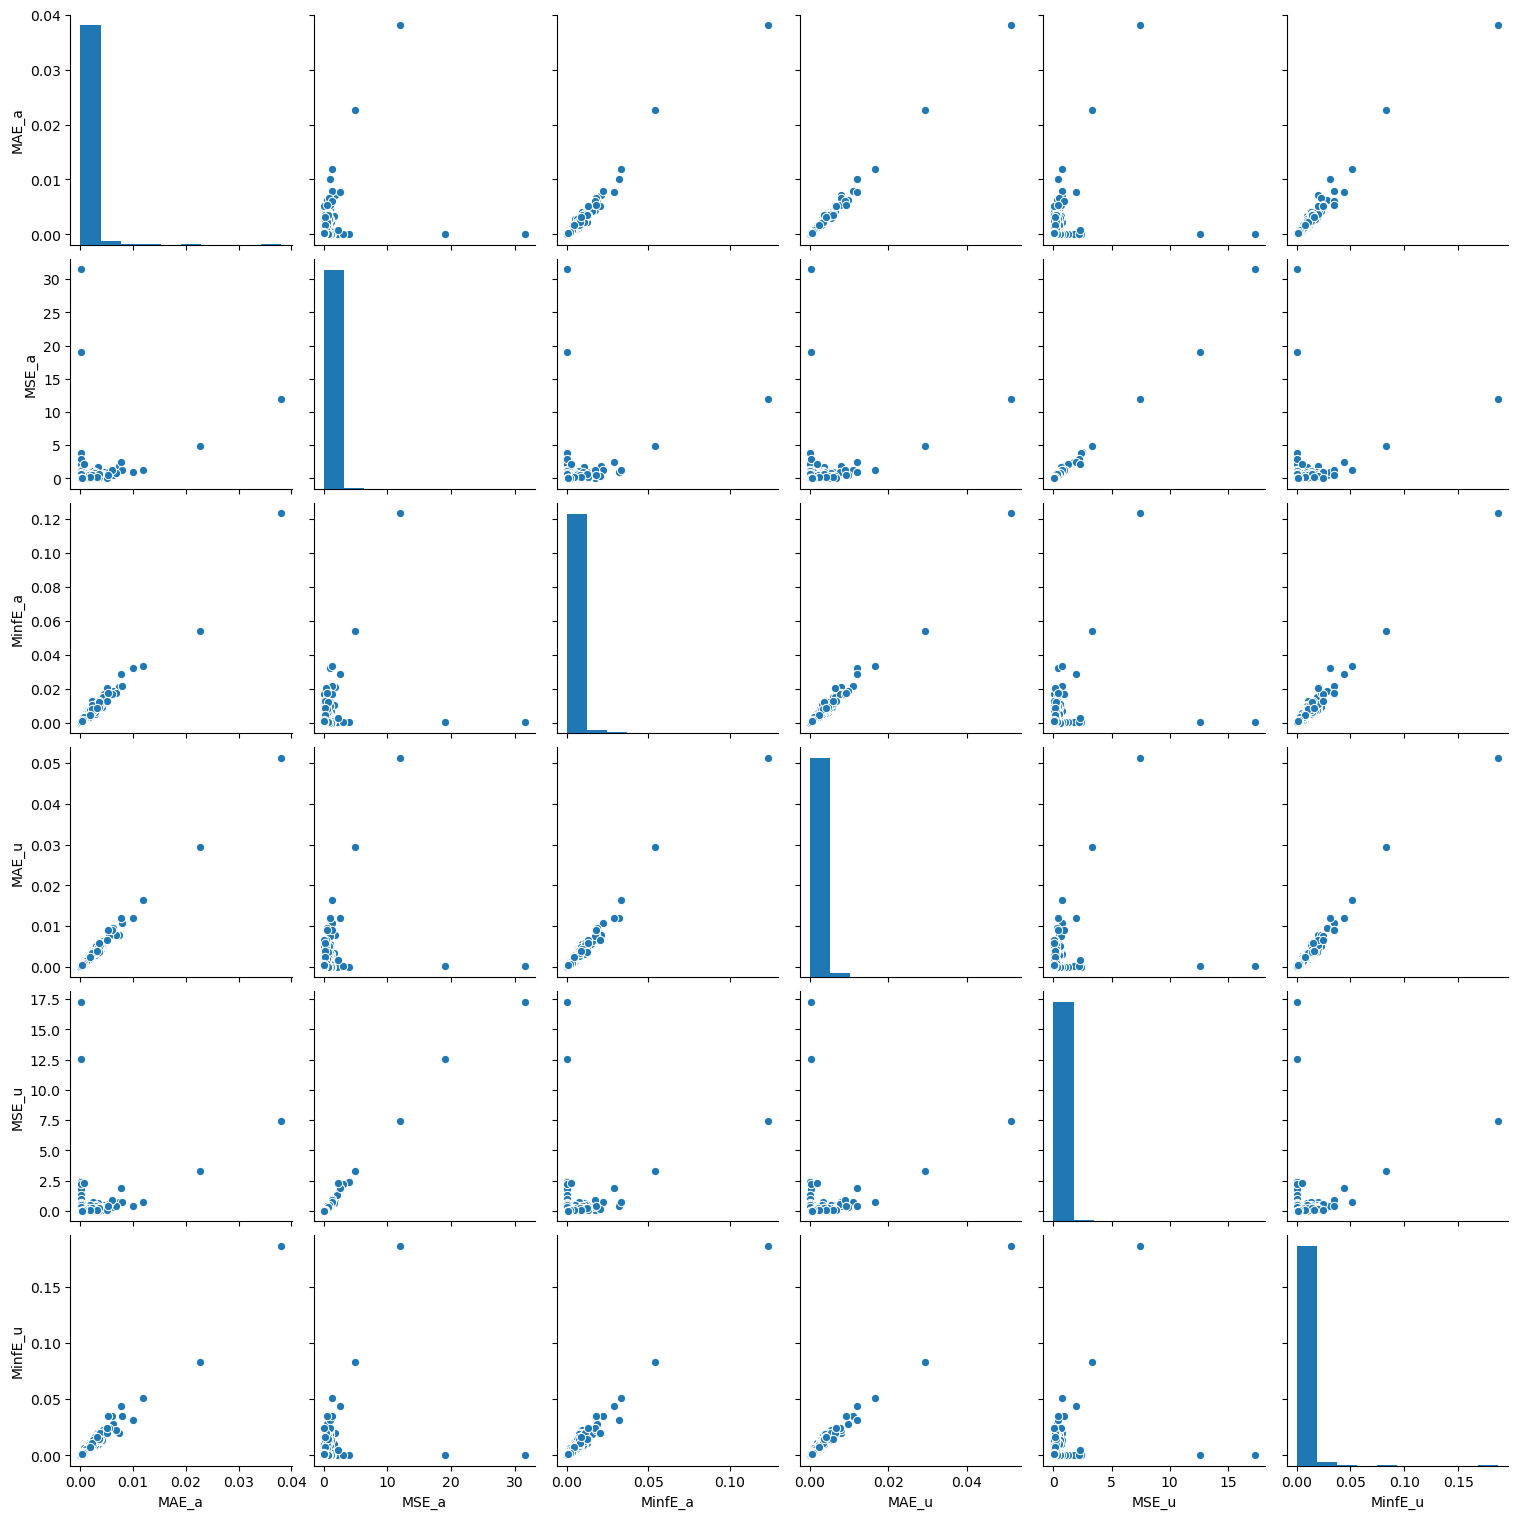

In [4]:
sns.pairplot(df)
plt.show()

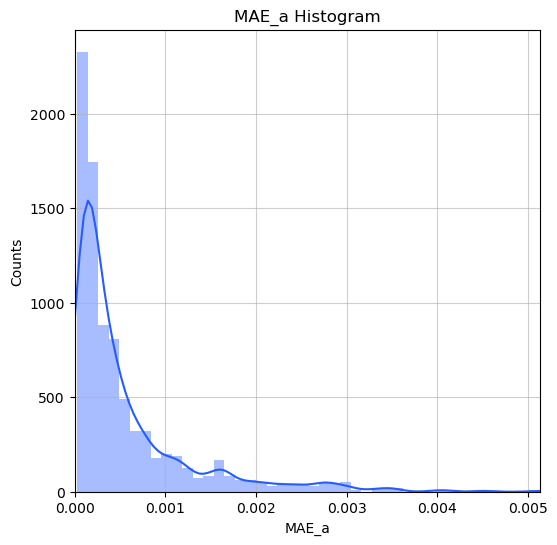

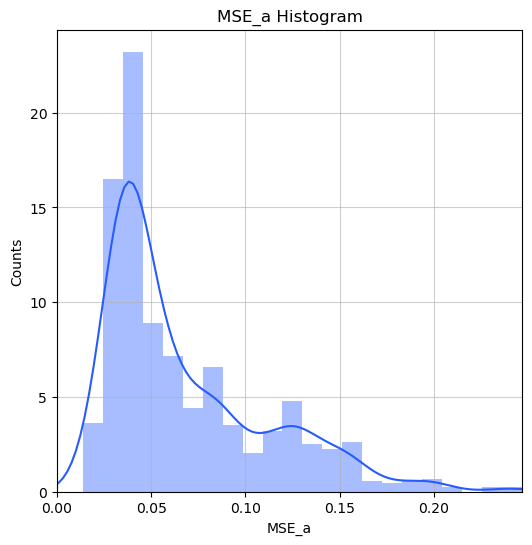

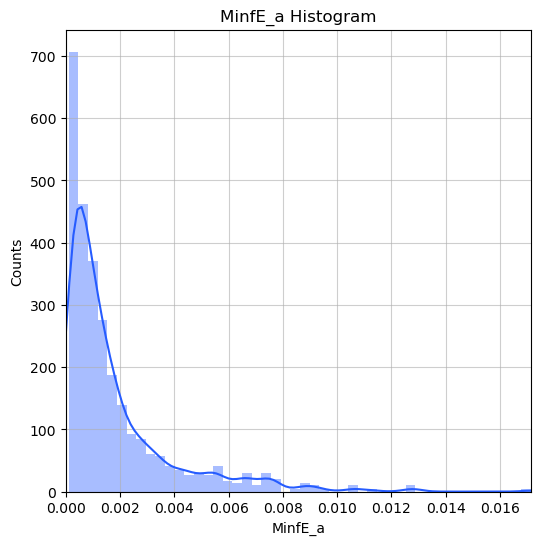

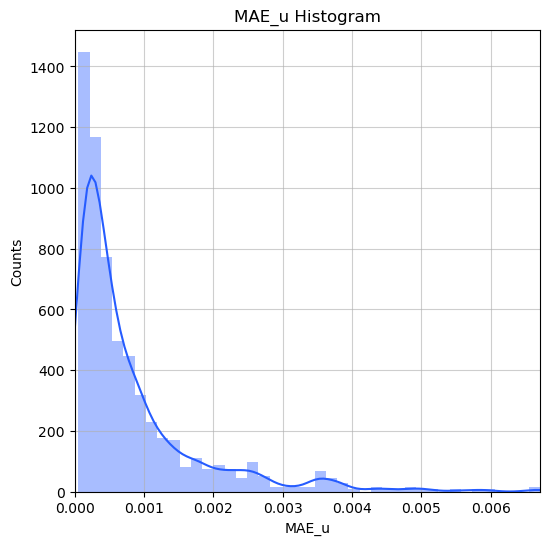

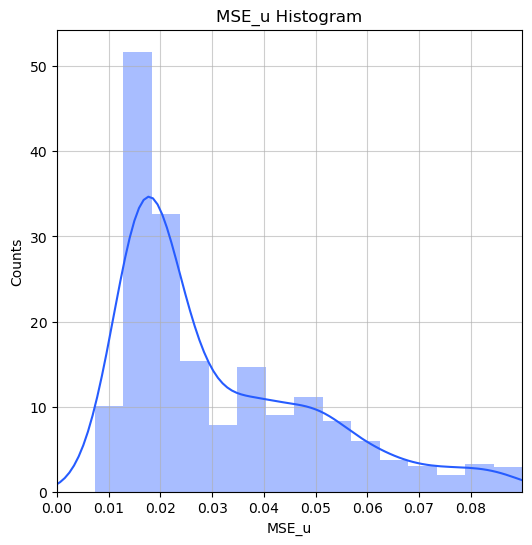

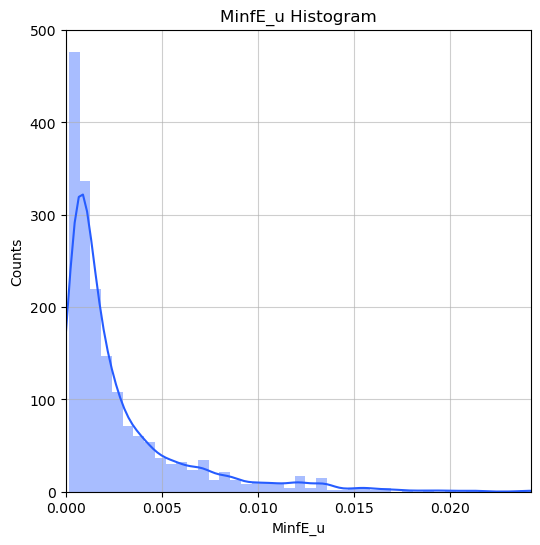

,MAE_a,MSE_a,MinfE_a,MAE_u,MSE_u,MinfE_u
count,829.000000,829.000000,829.000000,829.000000,829.000000,829.000000
mean,0.000567,0.068191,0.001798,0.000827,0.031249,0.002752
std,0.000715,0.043314,0.002124,0.000979,0.018971,0.003359
min,0.000028,0.013725,0.000109,0.000050,0.007331,0.000158
25%,0.000135,0.036798,0.000463,0.000222,0.016795,0.000663
50%,0.000295,0.050531,0.001032,0.000478,0.022964,0.001429
75%,0.000685,0.088415,0.002150,0.000987,0.043490,0.003330
max,0.005132,0.246903,0.017143,0.006709,0.089921,0.024209


In [5]:
# lim = 1
lim = 1.5*df['MSE_u'].quantile(0.75)
# lim = 1E4
sub_df = df[df['MSE_u'] < lim]

columns = sub_df.columns
for col in columns:
    if col in ('PWE_a', 'PWE_u'):
        continue
    plt.figure(figsize=(6,6))
    sns.distplot(sub_df[[f'{col}']], kde = True, color=BLUE)
    plt.grid(alpha=0.618)
    plt.xlabel(f'{col}')
    plt.title(f'{col} Histogram')
    plt.ylabel('Counts')
    plt.xlim(0, sub_df[f'{col}'].max())
    plt.show()
    
sub_df.describe()